# Simulations and Kernel Density Esitmation

This notebook looks at the simulation and kernel density estimation. It foucses on data generated from the Gamma distribution, simulating random variables from it using the accept/reject method, and kernel density estimator of the probability density function from simulated data.

In [1]:
import numpy as np  # for numerical pyhton libraries

import scipy.stats as st  # for statistical libraries

import matplotlib.pyplot as plt  # for plotting

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

Plot the Gamma distribution for a few different parameters

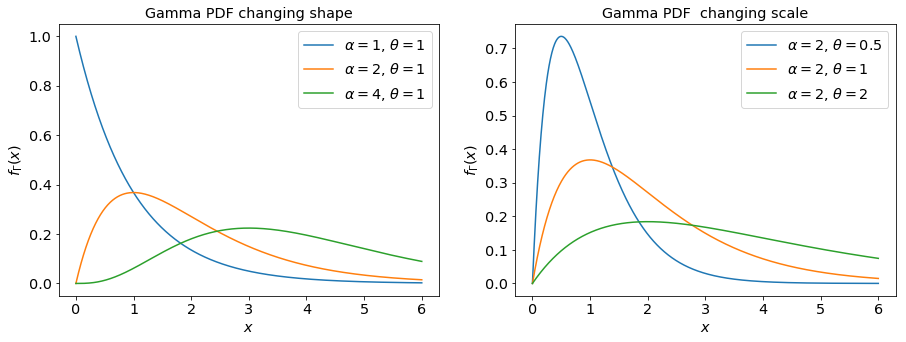

In [2]:
x = np.linspace(0,6,1000)

plt.subplot(1,2,1)
plt.plot(x, st.gamma.pdf(x, 1, 0, 1), label=r'$\alpha=1$, $\theta=1$')
plt.plot(x, st.gamma.pdf(x, 2, 0, 1), label=r'$\alpha=2$, $\theta=1$')
plt.plot(x, st.gamma.pdf(x, 4, 0, 1), label=r'$\alpha=4$, $\theta=1$')
plt.legend()
plt.xlabel(r'$x$')
plt.ylabel(r'$f_\Gamma(x)$')
plt.title(r'Gamma PDF changing shape')


plt.subplot(1,2,2)
plt.plot(x, st.gamma.pdf(x, 2, 0, 0.5), label=r'$\alpha=2$, $\theta=0.5$')
plt.plot(x, st.gamma.pdf(x, 2, 0, 1), label=r'$\alpha=2$, $\theta=1$')
plt.plot(x, st.gamma.pdf(x, 2, 0, 2), label=r'$\alpha=2$, $\theta=2$')
plt.legend()
plt.xlabel(r'$x$')
plt.ylabel(r'$f_\Gamma(x)$')
plt.title(r'Gamma PDF  changing scale')

plt.show()

## Use built in random generator to simulate gamma

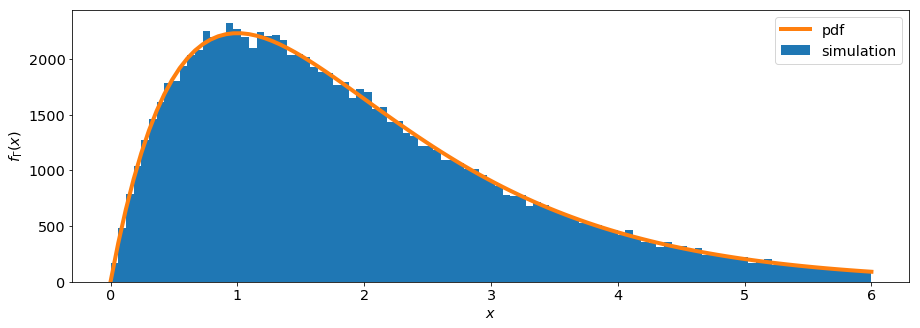

In [3]:
nsims=100000

x = np.linspace(0,6,100)
Y = np.random.gamma(2, 1, nsims)

plt.hist(Y, bins=x, label='simulation')
plt.plot(x, nsims*st.gamma.pdf(x, 2, 0, 1)*(x[1]-x[0]), linewidth=4,label='pdf')
plt.xlabel(r'$x$')
plt.ylabel(r'$f_\Gamma(x)$')
plt.legend()
plt.show()

## Use accept/reject method to generate Gamma

In [4]:
def SimGamma(shape, scale, nsims):
    
    Y = np.zeros((nsims,1))
    
    a = scale*shape
    c = a * np.exp( (shape-1)*np.log( (shape-1)/(1/scale-1/a) ) -1 )
    
    print('c=',c)
    
    for i in range(0,nsims):
        
        while True:
            y = -a*np.log(np.random.uniform())
            ratio = (1/c)*st.gamma.pdf(y,shape,0,scale)/(np.exp(-y/a)/a) 
            if np.random.uniform() < ratio:
                break
                
        Y[i]=y


    x = np.linspace(0,6,100)
    plt.hist(Y, bins=x, label='hist')
    plt.plot(x, nsims*st.gamma.pdf(x, shape, 0, scale)*(x[1]-x[0]), linewidth=4, label='gamma')
    plt.plot(x, nsims*np.exp(-x/a)/a*(x[1]-x[0])*c, linewidth=4, label='scaled exp')
    plt.xlabel(r'$x$')
    plt.ylabel(r'Hist / pdf')
    plt.legend()
    plt.show()
        
    return Y
        

c= 1.47151776469


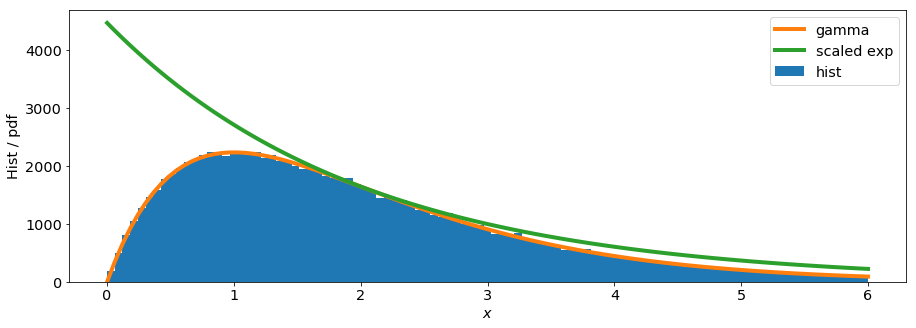

In [5]:
nsims=100000

Y = SimGamma(2, 1, nsims);

# Kernel Density Estimator using Gaussian Kernel
The kernel density estimator of a sample of data (of size $N$) corresponds to placing a distribution at each location of the data with weight equal to 1/N.
$$f(x) = \frac{1}{N}\sum_{i=1}^N \phi_{\epsilon}(x;y_i)$$
where $\phi_\epsilon(x;y)$ is the pdf of a random variable with mean $y$ and variance $\epsilon$. Here we will look at two examples, the normal KDE and the log-normal KDE

In [6]:
# Normal kernel density estimator of data Y with bandwidth ep
def KD_norm(Y, ep):
    
    ny = Y.size;
    nx = 100
    x = np.linspace(0,6,nx)
    f = np.zeros(nx)
    
    for y in Y:
        f += (1/ny)*st.norm.pdf(x, y, ep) 
            
    return f

In [7]:
#log Normal kernel density estimator of data Y with bandwidth ep
def KD_lognorm(Y, ep):
    
    ny = Y.size;
    nx = 100
    x = np.linspace(0,6,nx)
    f = np.zeros(nx)
    
    for y in Y:
        # note lognorm pdf is such that E[Y] = y, while sqrt(V[Y]) = y*sqrt(e^(ep**2)-1)
        f += (1/ny)*st.lognorm.pdf(x, ep, 0, y*np.exp(-0.5*ep*ep)) 
            
    return f

In [8]:
# a useful plotting function to show the kernel density esitmate and true distribution simultaneously
def MakePlot(x,f,shape,scale, title):
    plt.plot(x,f, label='KDE')
    plt.plot(x, st.gamma.pdf(x,shape, 0, scale), linewidth=1, label='gamma')
    plt.xlabel(r'$x$')
    plt.ylabel(r'pdf')
    plt.title( title + ' ep = '+ str(ep))
    plt.legend()

## simulate some data

c= 1.47151776469


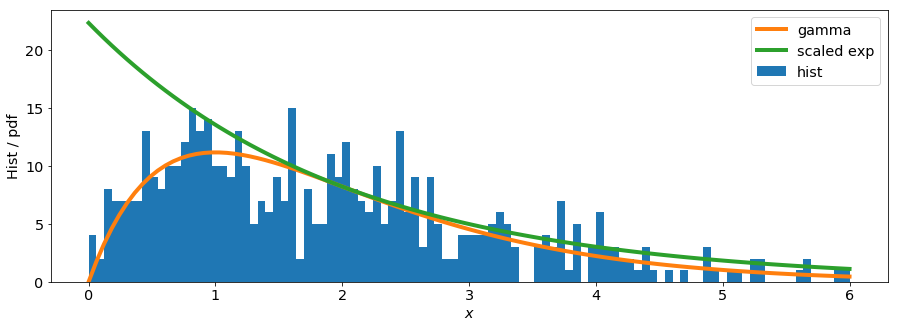

In [9]:
Y = SimGamma(2, 1, 500);

## Normal KDE use a few different bandwidths

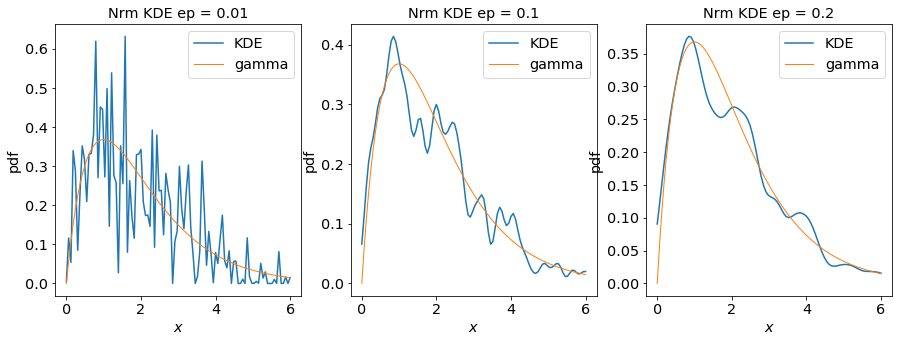

In [10]:
ep_list = np.array([0.01, 0.1, 0.2])

for idx,ep in enumerate(ep_list):
    f = KD_norm(Y, ep)
    plt.subplot(1,ep_list.size,idx+1)
    MakePlot(x,f,2,1, 'Nrm KDE')

plt.show()

## Lognormal KDE using a few different bandwidths

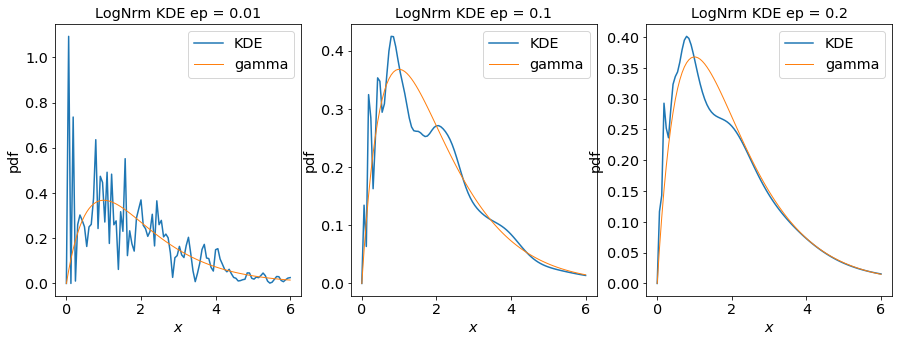

In [11]:
ep_list = np.array([0.01, 0.1, 0.2])

for idx,ep in enumerate(ep_list):
    f = KD_lognorm(Y, ep)
    plt.subplot(1,ep_list.size,idx+1)
    MakePlot(x,f,2,1, 'LogNrm KDE')

plt.show()